In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install imbalanced-learn

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import pickle
import numpy as np

# Carrier

In [ ]:
raw_csv_data=pd.read_csv("/content/drive/MyDrive/datasetW4/Final_Dataset_modify2_Carrier.csv")
df=raw_csv_data.copy()
df

,consignment_id,consignment_note,Account_name,account_type,PriorityLevel,AssignedTo,ConCreated,deleted,SenderCity,ReceiverCity,ServiceType,carrier_name,leg_type,from_leg,to_leg,depotname,LeggingCost
0,13086FE7-12A1-4467-964C-0000047EE392,IFL3022016,BELGOTEX NZ LTD,Customer,NaN,NaN,2022-05-14,False,AUCKLAND,Te Awamutu,BOP - Waikato,STL LINEHAUL,PU/LH/DL,AUCKLAND,TE AWAMUTU,STL AUCKLAND DEPOT,0.00
1,60351FC5-10B6-4497-B349-000225FB24D8,ECC0047429,freightplus,Customer,TTFS,ROCHELLE,2022-10-14,False,Auckland,Palmerston North,SuperEconomy,STL LINEHAUL,PU/LH/DL,OTAHUHU,PALMERSTON NORTH,STL AUCKLAND DEPOT,63.25
2,58041D20-90FF-4365-9EBD-00046E8DD1E5,IFL3029721,BELGOTEX NZ LTD,Customer,NaN,done,2023-04-21,False,AUCKLAND,TAURANGA,BOP - Waikato,STL LINEHAUL,PU/LH/DL,AUCKLAND,TAURANGA,STL AUCKLAND DEPOT,0.00
3,0AA9C307-3746-4302-A0B6-0004F0ACD64A,ECC0040335,AUSLINK LOGISTICS LIMITED,Customer,NaN,NaN,2022-01-19,False,Christchurch,Christchurch,Metro General,LK TRANSPORT Store Rite Logistics,PU/DL,Christchurch,Christchurch,NaN,13.40
4,E6A42B8A-B673-4B7B-8DFF-0005F5264B82,IFL3022422,BELGOTEX NZ LTD,Customer,NaN,NaN,2022-03-08,False,Auckland,Wellington,SuperEconomy,STL LINEHAUL,PU/LH/DL,AUCKLAND,WELLINGTON,STL Wellington,47.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36143,E83DCC0F-E207-42E2-9A34-FFFA6BF0399F,ECC0041208,TAI PING TRADING COMPANY LTD,Customer,NaN,NaN,2022-01-25,False,Auckland,Timaru,SuperEconomy,STL LINEHAUL,PU/LH,Auckland,Christchurch,STL AUCKLAND DEPOT,51.91
36144,E83DCC0F-E207-42E2-9A34-FFFA6BF0399F,ECC0041208,TAI PING TRADING COMPANY LTD,Customer,NaN,NaN,2022-01-25,False,Auckland,Timaru,SuperEconomy,SUMMERLAND,LH/DL,Christchurch,Timaru,NaN,32.39
36145,8F8F2508-9E79-4875-9215-FFFB36CEC073,ECC0046767,PYROTEK PRODUCTS LTD,Customer,overdue,HAYLEYW,2022-09-13,False,Auckland,Whangarei,Economy,FREIGHTPLUS LTD,PU/LH/DL,AUCKLAND,WHANGAREI,NaN,35.35
36146,825CCDEC-C8A3-4791-B394-FFFBC2D47CA2,IFL9025199,BELGOTEX NZ LTD,Customer,NaN,NaN,2022-06-28,False,Auckland,Auckland,Metro General,CARGO PLUS LTD,PU/LH/DL,AUCKLAND,KUMEU,NaN,34.77


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36148 entries, 0 to 36147
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   consignment_id    36148 non-null  object 
 1   consignment_note  36148 non-null  object 
 2   Account_name      36148 non-null  object 
 3   account_type      36148 non-null  object 
 4   PriorityLevel     5471 non-null   object 
 5   AssignedTo        9382 non-null   object 
 6   ConCreated        36148 non-null  object 
 7   deleted           36148 non-null  bool   
 8   SenderCity        36144 non-null  object 
 9   ReceiverCity      36134 non-null  object 
 10  ServiceType       36148 non-null  object 
 11  carrier_name      36148 non-null  object 
 12  leg_type          36148 non-null  object 
 13  from_leg          36148 non-null  object 
 14  to_leg            36148 non-null  object 
 15  depotname         15851 non-null  object 
 16  LeggingCost       35449 non-null  float6

In [ ]:
pd.set_option('display.max_rows', None)
df['carrier_name'].value_counts()

STL LINEHAUL                                14616
CARGO PLUS LTD                               6061
BASCIK TRANSPORT                             3168
FREIGHTPLUS LTD                              2734
SUMMERLAND                                   2071
MAINSTREAM NZ LTD                            1203
T&G TRANSPORT                                 947
LK TRANSPORT Store Rite Logistics             926
MAINSTREAM                                    870
bOOTH'S TRANSPORT (SI) LTD                    804
CARGOPLUS                                     614
FR8PLUS                                       366
LINFOX                                        168
ANGEL TRANSPORT                               166
TRANSFREIGHT                                  164
HALLS                                         122
COMBINED FREIGHTLINES                         106
PASS THE PARCEL                                81
HALLS REFRIGERATION                            71
QANTAS COURIERS                                67


In [ ]:
Ldata = df.copy()
Ldata=pd.concat([Ldata['ConCreated'],Ldata['Account_name'], Ldata['SenderCity'], Ldata['ReceiverCity'], Ldata['ServiceType'], Ldata['carrier_name'], Ldata['from_leg'], Ldata['to_leg'], Ldata['leg_type'] ], axis=1)
Ldata.head(10)

,ConCreated,Account_name,SenderCity,ReceiverCity,ServiceType,carrier_name,from_leg,to_leg,leg_type
0,2022-05-14,BELGOTEX NZ LTD,AUCKLAND,Te Awamutu,BOP - Waikato,STL LINEHAUL,AUCKLAND,TE AWAMUTU,PU/LH/DL
1,2022-10-14,freightplus,Auckland,Palmerston North,SuperEconomy,STL LINEHAUL,OTAHUHU,PALMERSTON NORTH,PU/LH/DL
2,2023-04-21,BELGOTEX NZ LTD,AUCKLAND,TAURANGA,BOP - Waikato,STL LINEHAUL,AUCKLAND,TAURANGA,PU/LH/DL
3,2022-01-19,AUSLINK LOGISTICS LIMITED,Christchurch,Christchurch,Metro General,LK TRANSPORT Store Rite Logistics,Christchurch,Christchurch,PU/DL
4,2022-03-08,BELGOTEX NZ LTD,Auckland,Wellington,SuperEconomy,STL LINEHAUL,AUCKLAND,WELLINGTON,PU/LH/DL
5,2023-01-26,BELGOTEX NZ LTD,AUCKLAND,Auckland,Metro General,CARGO PLUS LTD,AUCKLAND,HENDERSON,PU/LH/DL
6,2021-11-22,DHL EXPRESS - CHCH,Christchurch,Lake Hayes,Economy,SUMMERLAND,Christchurch,Queenstown,PU/LH/DL
7,2022-05-14,BELGOTEX NZ LTD,AUCKLAND,Wellington,SuperEconomy,STL LINEHAUL,AUCKLAND,WELLINGTON,PU/LH/DL
8,2022-07-28,FORCE4 LIMITED,Wellington,SILVERDALE,Metro General,GREAT BARRIER CARTAGE LTD,WELLINGTON,AUCKLAND,PU/DL
9,2022-07-04,BELGOTEX NZ LTD,Auckland,New Plymouth,SuperEconomy,STL LINEHAUL,AUCKLAND,NEW PLYMOUTH,PU/LH/DL


In [ ]:
value_counts = Ldata['carrier_name'].value_counts()
filtered_data = Ldata[Ldata['carrier_name'].isin(value_counts[value_counts < 50].index)]
filtered_data

,ConCreated,Account_name,SenderCity,ReceiverCity,ServiceType,carrier_name,from_leg,to_leg,leg_type
8,2022-07-28,FORCE4 LIMITED,Wellington,SILVERDALE,Metro General,GREAT BARRIER CARTAGE LTD,WELLINGTON,AUCKLAND,PU/DL
102,2022-11-04,CHAMPION FREIGHT,Levin,Feilding,Economy,JETS TRANSPORT LTD,LEVIN,FEILDING,PU/LH/DL
234,2022-05-25,GDF NEW ZEALAND LTD,Auckland,MANGAWHAI,Economy,TRANSCON,MANUKAU,MANGAWHAI,PU/LH/DL
400,2023-05-30,HMI TECHNOLOGIES LTD,Auckland,Invercargill,SuperEconomy,BOOTH'S TRANSPORT (SI) LTD,CHRISTCHURCH,INVERCARGILL,PU/LH/DL
450,2023-01-31,EMO TRANS NZ LTD,CHRISTCHURCH,Tekapo,Container,Timatanga Enterprises Ltd,CHRISTCHURCH,TEKAPO,PU/LH/DL
455,2022-07-14,LEAFT FOODS LTD,AUCKLAND,LINCOLN,Economy,CONROYS REMOVALS LTD,CHRISTCHURCH,LINCOLN,PU/DL
490,2021-12-07,AUCKLAND RACKING & SHELVING,Auckland,Warkworth,Economy,TRANSCON,Auckland,Warkworth,PU/LH/DL
526,2022-01-12,EXPRESS CARGO,Queenstown,Auckland,Container,MOVE LOGISTICS LTD,Queenstown,Auckland,PU/LH/DL
562,2022-09-14,DHL EXPRESS - CHCH,Christchurch,Darfield,Economy,BOOTHS TRANSPORT LTD,CHRISTCHURCH,DARFIELD,PU/DL
563,2022-09-09,EXPRESS CARGO,Christchurch,Prebbleton,HiAb / Crane Truck,Timatanga Enterprises Ltd,CHRISTCHURCH,CHRISTCHURCH,PU/DL


In [ ]:
Ldata=Ldata.drop(['ConCreated'], axis=1)

In [ ]:
Ldata.drop(Ldata.loc[Ldata['Account_name'].isnull()].index, inplace = True)
Ldata.drop(Ldata.loc[Ldata['SenderCity'].isnull()].index, inplace = True)
Ldata.drop(Ldata.loc[Ldata['ReceiverCity'].isnull()].index, inplace = True)
Ldata.drop(Ldata.loc[Ldata['ServiceType'].isnull()].index, inplace = True)
Ldata.drop(Ldata.loc[Ldata['carrier_name'].isnull()].index, inplace = True)
Ldata.drop(Ldata.loc[Ldata['leg_type'].isnull()].index, inplace = True)

In [ ]:
Ldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36130 entries, 0 to 36147
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Account_name  36130 non-null  object
 1   SenderCity    36130 non-null  object
 2   ReceiverCity  36130 non-null  object
 3   ServiceType   36130 non-null  object
 4   carrier_name  36130 non-null  object
 5   from_leg      36130 non-null  object
 6   to_leg        36130 non-null  object
 7   leg_type      36130 non-null  object
dtypes: object(8)
memory usage: 2.5+ MB


In [ ]:
Ldata['Account_name'] = Ldata['Account_name'].str.lower()
Ldata['SenderCity'] = Ldata['SenderCity'].str.lower()
Ldata['ReceiverCity'] = Ldata['ReceiverCity'].str.lower()
Ldata['ServiceType'] = Ldata['ServiceType'].str.lower()
Ldata['carrier_name'] = Ldata['carrier_name'].str.lower()
Ldata['leg_type'] = Ldata['leg_type'].str.lower()
Ldata['from_leg'] = Ldata['from_leg'].str.lower()
Ldata['to_leg'] = Ldata['to_leg'].str.lower()
Ldata.head(10)

,Account_name,SenderCity,ReceiverCity,ServiceType,carrier_name,from_leg,to_leg,leg_type
0,belgotex nz ltd,auckland,te awamutu,bop - waikato,stl linehaul,auckland,te awamutu,pu/lh/dl
1,freightplus,auckland,palmerston north,supereconomy,stl linehaul,otahuhu,palmerston north,pu/lh/dl
2,belgotex nz ltd,auckland,tauranga,bop - waikato,stl linehaul,auckland,tauranga,pu/lh/dl
3,auslink logistics limited,christchurch,christchurch,metro general,lk transport store rite logistics,christchurch,christchurch,pu/dl
4,belgotex nz ltd,auckland,wellington,supereconomy,stl linehaul,auckland,wellington,pu/lh/dl
5,belgotex nz ltd,auckland,auckland,metro general,cargo plus ltd,auckland,henderson,pu/lh/dl
6,dhl express - chch,christchurch,lake hayes,economy,summerland,christchurch,queenstown,pu/lh/dl
7,belgotex nz ltd,auckland,wellington,supereconomy,stl linehaul,auckland,wellington,pu/lh/dl
8,force4 limited,wellington,silverdale,metro general,great barrier cartage ltd,wellington,auckland,pu/dl
9,belgotex nz ltd,auckland,new plymouth,supereconomy,stl linehaul,auckland,new plymouth,pu/lh/dl


In [ ]:
Ldata.loc[Ldata['carrier_name'] == 'cargoplus', 'carrier_name'] = 'cargo plus ltd'
Ldata.loc[Ldata['carrier_name'] == 'cargoplus ', 'carrier_name'] = 'cargo plus ltd'
Ldata.loc[Ldata['carrier_name'] == 'fr8plus', 'carrier_name'] = 'freightplus ltd'
Ldata.loc[Ldata['carrier_name'] == 'mainstream', 'carrier_name'] = 'mainstream nz ltd'
Ldata.to_csv('Carrier.csv', index=False)

In [ ]:
pd.set_option('display.max_rows', None)
Ldata['carrier_name'].value_counts()

stl linehaul                                14611
cargo plus ltd                               6695
bascik transport                             3166
freightplus ltd                              3100
mainstream nz ltd                            2072
summerland                                   2061
t&g transport                                 947
lk transport store rite logistics             926
booth's transport (si) ltd                    829
linfox                                        168
angel transport                               166
transfreight                                  164
halls                                         122
combined freightlines                         106
pass the parcel                                81
halls refrigeration                            71
qantas couriers                                67
urgent couriers ltd                            65
sub60                                          65
mackenzie transport ltd                        61


In [ ]:
Ldata.loc[Ldata['leg_type'] == 'pu(pickup)', 'leg_type'] = 'pu (pickup)'
Ldata.loc[Ldata['leg_type'] == 'dl(delivery)', 'leg_type'] = 'dl (delivery)'

In [ ]:
Ldata['leg_type'].value_counts()

pu/lh/dl          31987
pu/dl              2808
pu/lh               483
lh/dl               475
dl (delivery)       215
pu (pickup)         132
lh (line haul)       30
Name: leg_type, dtype: int64

In [ ]:
Legdata = Ldata.copy()
Legdata.to_csv('LeggingData.csv', index=False)

In [ ]:
target_features = ['Account_name', 'SenderCity', 'ReceiverCity', 'ServiceType','carrier_name','from_leg','to_leg']
target_variable = 'leg_type'

In [ ]:
# Prepare input data
input_data = Ldata[target_features]
target_data = Ldata[target_variable]

In [ ]:
# Determine the minimum and maximum number of instances desired for each class
min_instances_per_class = 30  # Minimum number of instances per class
max_instances_per_class = 2500  # Maximum number of instances per class

# Calculate the class counts
class_counts = target_data.value_counts()

# Filter out classes with insufficient or excessive data
valid_classes = class_counts[
    (class_counts >= min_instances_per_class)
].index
df_filtered = Ldata[Ldata[target_variable].isin(valid_classes)]

# Reduce the number of samples for classes with more than 2000 instances
df_resampled = pd.DataFrame(columns=df_filtered.columns)
for cls in valid_classes:
    instances = df_filtered[df_filtered[target_variable] == cls]
    if len(instances) > max_instances_per_class:
        instances = instances.sample(max_instances_per_class, random_state=42)
    df_resampled = pd.concat([df_resampled, instances])


df_resampled.head(10)

,Account_name,SenderCity,ReceiverCity,ServiceType,carrier_name,from_leg,to_leg,leg_type
11237,belgotex nz ltd,auckland,auckland,metro general,cargo plus ltd,auckland,papakura,pu/lh/dl
22301,greenstar holding limited,auckland,wairoa,supereconomy,stl linehaul,auckland,wairoa,pu/lh/dl
26596,belgotex nz ltd,tauranga,rotorua,bop - waikato,stl linehaul,auckland,rotorua,pu/lh/dl
13605,belgotex nz ltd,auckland,tauranga,bop - waikato,stl linehaul,auckland,mt maunganui,pu/lh/dl
7637,belgotex nz ltd,auckland,hamilton,bop - waikato,stl linehaul,auckland,hamilton,pu/lh/dl
8059,dhl express new zealand ltd,hāwea flat,christchurch,economy,summerland,dunedin,christchurch,pu/lh/dl
6767,oceania aviation ltd,ardmore,nelson,economy,bascik transport,auckland,nelson,pu/lh/dl
29997,gea new zealand limited,auckland,edgecumbe,economy,mainstream nz ltd,auckland,edgecumbe,pu/lh/dl
13063,fusion workplace services,auckland,christchurch,economy,bascik transport,auckland,christchurch,pu/lh/dl
25422,belgotex nz ltd,auckland,hamilton,bop - waikato,stl linehaul,auckland,hamilton,pu/lh/dl


In [ ]:
df_resampled.to_csv('Removed_Carrier.csv', index=False)
df_resampled=pd.read_csv("Removed_Carrier.csv")

In [ ]:
EncodedData = df_resampled.copy()
# Create a dictionary to store the encoders for each feature
encoders = {}

# Encode categorical variables
for feature in target_features:
    label_encoder = LabelEncoder()
    EncodedData[feature] = label_encoder.fit_transform(EncodedData[feature])
    encoders[feature] = label_encoder

In [ ]:
EncodedData.to_csv('Encoded_Carrier.csv', index=False)


In [ ]:
EncodedData=pd.read_csv("Encoded_Carrier.csv")
EncodedData.head(10)

,Account_name,SenderCity,ReceiverCity,ServiceType,carrier_name,from_leg,to_leg,leg_type
0,15,5,11,12,8,11,157,pu/lh/dl
1,58,5,252,17,66,11,245,pu/lh/dl
2,15,90,193,0,66,11,190,pu/lh/dl
3,15,5,218,0,66,11,128,pu/lh/dl
4,15,5,64,0,66,11,69,pu/lh/dl
5,36,34,28,4,69,23,36,pu/lh/dl
6,84,2,140,4,4,11,132,pu/lh/dl
7,55,5,44,4,45,11,47,pu/lh/dl
8,52,5,28,4,4,11,36,pu/lh/dl
9,15,5,64,0,66,11,69,pu/lh/dl


In [ ]:
import pickle

# Assuming 'encoder' is your encoder object
with open("encoder.pkl", "wb") as file:
    pickle.dump(encoders, file)
with open("encoder.pkl", "rb") as file:
    encoders = pickle.load(file)

In [ ]:
EncodedData['leg_type'].value_counts()

pu/lh/dl          2500
pu/dl             2500
pu/lh              483
lh/dl              475
dl (delivery)      215
pu (pickup)        132
lh (line haul)      30
Name: leg_type, dtype: int64

In [ ]:
# Prepare input data
input_data = EncodedData[target_features]
target_data = EncodedData[target_variable]

In [ ]:
# Apply feature weights to the input data
feature_weights = [0.1, 0.2, 0.2, 0.3, 0.4, 0.2, 0.2]
input_data_weighted = input_data.copy()
for i, feature in enumerate(target_features):
    input_data_weighted[feature] = input_data_weighted[feature] * feature_weights[i]


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
input_train, input_test, target_train, target_test = train_test_split(
    input_data_weighted, target_data, test_size=0.2, random_state=42
)


## **LightGBM Model**

In [ ]:
#LightGBM
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(objective='multiclass', random_state=5)
lgbm.fit(input_train, target_train)

y_pred = lgbm.predict(input_test)

result2 = accuracy_score(target_test,y_pred)
print('Accuracy:',result2*100,'%')
#print(confusion_matrix(target_test, y_pred))

Accuracy: 86.2 %


## **KNN Model**

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier


#Create KNN Classifier
knn = KNeighborsClassifier(leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=1,
                     weights='uniform')

#Train the model using the training sets
knn.fit(input_train, target_train)

#Predict the response for test dataset
y_pred = knn.predict(input_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))

Accuracy: 0.7434885556432518


## **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train the random forest model
random_forest = RandomForestClassifier() #(class_weight=class_weights)
random_forest.fit(input_train, target_train)

# Evaluate the model
predictions = random_forest.predict(input_test)
accuracy = accuracy_score(target_test, predictions)
print("Accuracy:", accuracy*100,"%")

# Save the trained model to a pickle file
with open("random_forest_model_legging.pkl", "wb") as file:
    pickle.dump(random_forest, file)

# Load the saved model from the pickle file
with open("random_forest_model_legging.pkl", "rb") as file:
    loaded_model = pickle.load(file)



Accuracy: 90.02380952380953 %


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)
grid_search.fit(input_data, target_data)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.8144795682018625


In [ ]:
# Generate recommendations using the loaded model
input_sample = [['belgotex nz ltd', 'christchurch', 'wellington', 'economy', 'cargo plus ltd',	'christchurch',	'papakura']]  # Replace with your specific input data

# Encode the input sample using the saved encoders
input_sample_encoded = []
for i, feature in enumerate(target_features):
    encoder = encoders[feature]
    input_sample_encoded.append(encoder.transform([input_sample[0][i]])[0])

# Generate a single recommendation
recommendation = loaded_model.predict([input_sample_encoded])[0]
print("Recommended Carrier:", recommendation)

# Generate multiple recommendations (top k predictions)
k = 4  # Number of recommendations to generate
proba_scores = loaded_model.predict_proba([input_sample_encoded])[0]
top_k_indices = np.argsort(proba_scores)[-k:][::-1]

print("Recommended Carriers:")
for index in top_k_indices:
    carrier = loaded_model.classes_[index]
    print(carrier)
print("\n")

Recommended Carrier: pu/lh
Recommended Carriers:
pu/lh
pu/dl
pu/lh/dl
dl (delivery)




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

labels = ['pu/dl', 'pu/lh/dl', 'pu/lh', 'lh/dl', 'dl (delivery)', 'pu (pickup)', 'lh (line haul)']
confusion_mat = confusion_matrix(target_test, predictions, labels=labels)

confusion_df = pd.DataFrame(confusion_mat, index=labels, columns=labels)
print(confusion_df)


                pu/dl  pu/lh/dl  pu/lh  lh/dl  dl (delivery)  pu (pickup)  \
pu/dl             522        56      3     14              7           13   
pu/lh/dl           39       449     14     41             12           10   
pu/lh               7        14    553      6              4            9   
lh/dl              12        29      8    555             13            5   
dl (delivery)      10         1      3     17            574            5   
pu (pickup)         7         0      0      2              6          567   
lh (line haul)      9         0      2     12              0            0   

                lh (line haul)  
pu/dl                        3  
pu/lh/dl                     1  
pu/lh                        7  
lh/dl                       10  
dl (delivery)                7  
pu (pickup)                  1  
lh (line haul)             561  


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(target_test, predictions)
print("Model Report:")
print(report)

Model Report:
                precision    recall  f1-score   support

 dl (delivery)       0.93      0.93      0.93       617
lh (line haul)       0.95      0.96      0.96       584
         lh/dl       0.86      0.88      0.87       632
   pu (pickup)       0.93      0.97      0.95       583
         pu/dl       0.86      0.84      0.85       618
         pu/lh       0.95      0.92      0.93       600
      pu/lh/dl       0.82      0.79      0.81       566

      accuracy                           0.90      4200
     macro avg       0.90      0.90      0.90      4200
  weighted avg       0.90      0.90      0.90      4200



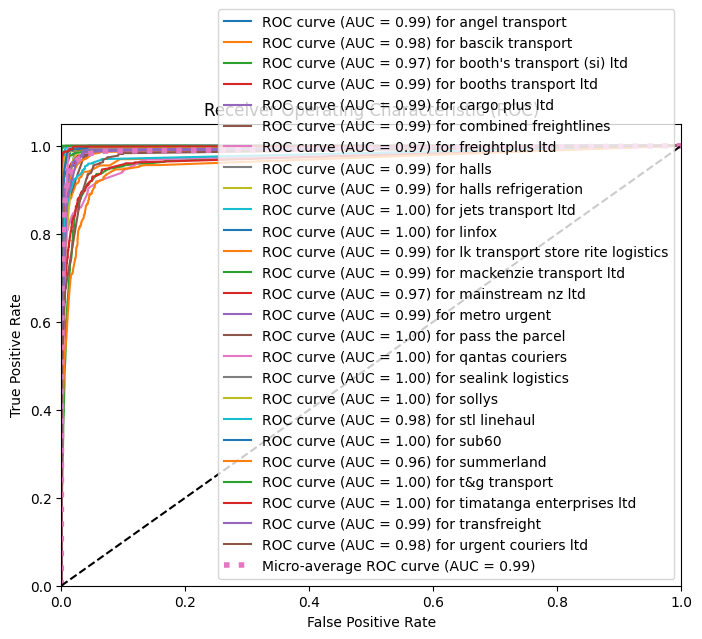

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

# Convert the target variables to binary format
target_test_bin = label_binarize(target_test, classes=random_forest.classes_)

# Get the predicted probabilities for each class
probs = random_forest.predict_proba(input_test)

# Compute the false positive rate (fpr), true positive rate (tpr), and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, class_name in enumerate(random_forest.classes_):
    fpr[class_name], tpr[class_name], _ = roc_curve(target_test_bin[:, i], probs[:, i])
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(target_test_bin.ravel(), probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for class_name in random_forest.classes_:
    plt.plot(fpr[class_name], tpr[class_name], label='ROC curve (AUC = %0.2f) for %s' % (roc_auc[class_name], class_name))

# Plot the micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (AUC = %0.2f)' % roc_auc_micro, linestyle=':', linewidth=4)

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Set the plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## **DL Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np

In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
target_train_encoded = label_encoder.fit_transform(target_train)
target_test_encoded = label_encoder.transform(target_test)


# Define the neural network architecture
model = Sequential()
model.add(Dense(128, input_shape=(7,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(input_train, target_train_encoded, epochs=10, batch_size=32)

# Evaluate the model
_, accuracy = model.evaluate(input_test, target_test_encoded)
print("Accuracy:", accuracy)

Epoch 1/10
159/159 [==============================] - 3s 3ms/step - loss: 1.5955 - accuracy: 0.5702
Epoch 2/10
159/159 [==============================] - 0s 3ms/step - loss: 1.0846 - accuracy: 0.6486
Epoch 3/10
159/159 [==============================] - 0s 3ms/step - loss: 1.0142 - accuracy: 0.6612
Epoch 4/10
159/159 [==============================] - 0s 3ms/step - loss: 0.9804 - accuracy: 0.6719
Epoch 5/10
159/159 [==============================] - 0s 3ms/step - loss: 0.9386 - accuracy: 0.6819
Epoch 6/10
159/159 [==============================] - 0s 3ms/step - loss: 0.9137 - accuracy: 0.6949
Epoch 7/10
159/159 [==============================] - 0s 3ms/step - loss: 0.8997 - accuracy: 0.6999
Epoch 8/10
159/159 [==============================] - 0s 3ms/step - loss: 0.8879 - accuracy: 0.7082
Epoch 9/10
159/159 [==============================] - 0s 3ms/step - loss: 0.8664 - accuracy: 0.7117
Epoch 10/10
40/40 [==============================] - 0s 2ms/step - loss: 0.8573 - accuracy: 0.7269
A

In [ ]:
selected_Carriers=pd.read_csv("Removed_Carrier.csv")

import pandas as pd

# Read the dataset
data = selected_Carriers

# Create a list of unique values for each column
unique_values = {}
for column in data.columns:
    unique_values[column] = data[column].unique().tolist()

    # Store the unique values in a separate CSV file
    unique_values_df = pd.DataFrame({column: unique_values[column]})
    unique_values_df.to_csv(f"{column}_unique_values.csv", index=False)

    print(f"Unique values for {column} have been saved in {column}_unique_values.csv")



Unique values for Account_name have been saved in Account_name_unique_values.csv
Unique values for SenderCity have been saved in SenderCity_unique_values.csv
Unique values for ReceiverCity have been saved in ReceiverCity_unique_values.csv
Unique values for ServiceType have been saved in ServiceType_unique_values.csv
Unique values for carrier_name have been saved in carrier_name_unique_values.csv
